In [2]:
#Eg1 • Compute -- What are the top 10 Zipcodes for 911 & Question 1: Are Zipcodes 19446 and 19090 present ?

#importing required module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading the csv file
dataset = pd.read_csv("mew2ktykm4.csv")

#Top 10 zipcodes for 911
print("Top 10 zipcodes for 911 calls are:\n%s" %(dataset['zip'].value_counts().head(10).keys()))

print("*"*50)

# Are Zipcodes 19446 and 19090 present ?
zipcodes= [19446, 19090]
for elem in zipcodes:
    if elem in list(dataset['zip'].value_counts().head(10).keys()):
        print("Yes, zipcode %s is present " %(elem))
    else:
        print("Zipcode %s is not present " %(elem))

Top 10 zipcodes for 911 calls are:
Float64Index([19401.0, 19464.0, 19403.0, 19446.0, 19406.0, 19002.0, 19468.0,
              19046.0, 19454.0, 19090.0],
             dtype='float64')
**************************************************
Yes, zipcode 19446 is present 
Yes, zipcode 19090 is present 


In [3]:
#Eg2 • Compute -- What are the top 4 townships (twp) for 911 calls & Question 2: Which of the following township are not present? 
#-- LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON

#Top 4 townships(twp) for 911 calls
print("Top 4 townships for 911 calls are:\n%s" %(dataset['twp'].value_counts().head(4).keys().tolist()))

print("*"*50)

# townships present or not?
twps= ['LOWER POTTSGROVE', 'NORRISTOWN', 'HORSHAM', 'ABINGTON']
print("Following townships are not present:")
for elem in twps:
    if elem not in list(dataset['twp'].value_counts().head(4).keys()):
        print(elem)

Top 4 townships for 911 calls are:
['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'UPPER MERION']
**************************************************
Following townships are not present:
LOWER POTTSGROVE
HORSHAM


In [4]:
#Eg3 Method
#Compute -- Create new features & Question 3: What is the most common Reason for a 911 call based on Reason Column? Which comes second

import re
#Extracting list of reasons for a 911 call
rsn_list =[]
for rsn in dataset['title'].tolist():
    rsn_list+= [(re.match("(.*?):",rsn).group())]
# Inserting Reason column to the dataset  
dataset['Reason'] = rsn_list

#Finding count of each reason in descending order
sorted_rsn_list = dataset['Reason'].value_counts().keys().tolist()
sorted_rsn_count = dataset['Reason'].value_counts().tolist()

# printing most common and second common reason for 911 calls
print("Most common reason is %s %s calls" %(sorted_rsn_list[0],sorted_rsn_count[0]))
print("Second common reason is %s %s calls" %(sorted_rsn_list[1],sorted_rsn_count[1]))


Most common reason is EMS: 133234 calls
Second common reason is Traffic: 93400 calls


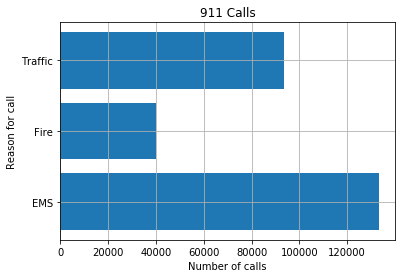

In [5]:
#Eg4 • Compute -- Plot barchart using matplot for 911 calls by Reason & Question 4: How can you plot the bars horizontally ?

#listing all the reasons for 911 calls
reason_lst = dataset['title'].tolist()
reason = {}
#finding count of calls for each reason
for i in range(len(reason_lst)):
    reason[reason_lst[i][0:reason_lst[i].find(':')]] = reason.get(reason_lst[i][0:reason_lst[i].find(':')],0)+1

#plotting the bars horizontally for 911 calls by Reason
plt.barh(list(reason.keys()),list(reason.values()))
plt.grid(True)
plt.xlabel('Number of calls')
plt.ylabel('Reason for call')
plt.title('911 Calls')
plt.show()

In [6]:
#Eg5 • Do data manipulation & Question 5: Which day got maximum calls for EMS and how many?

from dateutil.parser import parse
from datetime import date
from collections import defaultdict

#List of dates which has EMS calls
ems_call_dates = dataset['timeStamp'][dataset['title'].str.contains('EMS:')].value_counts().keys().tolist()
#List focount of EMS calls
ems_call_count = dataset['timeStamp'][dataset['title'].str.contains('EMS:')].value_counts().tolist()

#converting EMS call dates to weekday
ems_call_days=[]
for i in range(len(ems_call_dates)):
    ems_call_days += [((parse(ems_call_dates[i])).strftime('%A'))]

#Dictionary for storing call day and corresponding number of EMS calls
ems_call_dict = defaultdict(list)
for i, j in zip(ems_call_days, ems_call_count):
    ems_call_dict[i].append(j)

#Finding day with maximum number of occurrances
tot_call_count = {}
for day in ems_call_dict.keys():
    tot_call_count[day] = sum(ems_call_dict[day])

for wkday in tot_call_count:
    if tot_call_count[wkday] == max(tot_call_count.values()):
        print("Day with maximum number of EMS calls is %s: %s" %(wkday,max(tot_call_count.values())))

Day with maximum number of EMS calls is Friday: 19938


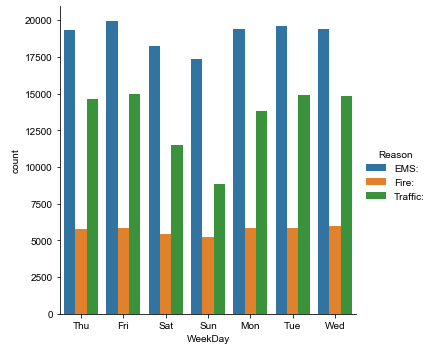

Day on which traffic calls were lowest is Sunday


In [7]:
#Eg6 • Compute -- Create a countplot of the Day of Week column with the hue based of the Reason column & 
#Question 6: On which day traffic calls were lowest ?

import matplotlib.pyplot as plt
import seaborn as sns

#Creating a list of reasons for 911 calls
call_reason = dataset['title'].tolist()
#Creating a list of timestamps for 911 calls
call_date= dataset['timeStamp'].tolist()

#Creating a list of days corresponding to each timestamp
call_day=[]
for i in range(len(call_date)):
    call_day += [((parse(call_date[i])).strftime('%a'))]

#Creating Weekday column for the given timestamp column
dataset['WeekDay']=call_day

# #Plotting countplot of the Day of Week column with the hue based of the Reason column
g = sns.catplot(x="WeekDay", hue="Reason", data=dataset, kind="count")
sns.set()
sns.set_style("whitegrid",{'axes.grid': True, 'axes.spines.bottom': True,'axes.spines.left': True,'axes.spines.right': True,
                           'axes.spines.top': True})
plt.show()

#Day on which traffic calls were lowest
new_df = (dataset[['WeekDay','Reason']][dataset['Reason'] == 'Traffic:'])
min_traf = new_df.groupby('WeekDay', as_index=False)['Reason'].count()
min_traf_day = (min_traf['WeekDay'][min_traf['Reason'] == min_traf['Reason'].min()]).tolist()
print("Day on which traffic calls were lowest is %sday" %(min_traf_day[0]))


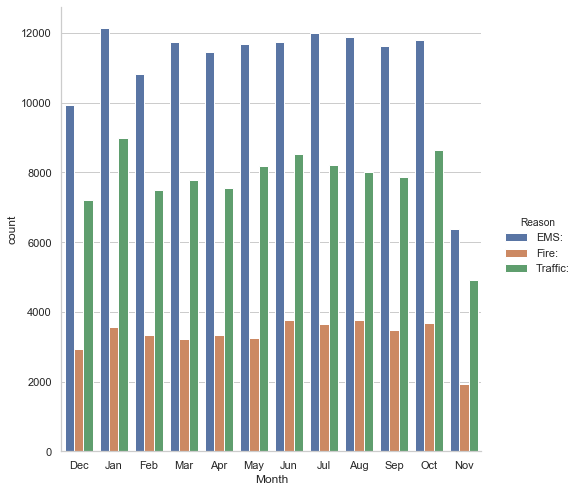

Month with highest calls for fire is Jun


In [8]:
#Eg7 • Compute -- Create a countplot month wise -- Question 7: Which month saw highest calls for fire?
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

#Creating list of months corresponding to each timestamp
month_lst = []
for elem in dataset['timeStamp'].tolist():
    datee = datetime.datetime.strptime(elem, "%Y-%m-%d %H:%M:%S")
    month_lst += [calendar.month_abbr[datee.month]]

#Creating "Month" column and assigning it month_lst value
dataset['Month']=month_lst

#Creating countplot month wise
grp = sns.catplot(x="Month", hue="Reason", data=dataset, kind="count", height=7, aspect=1, margin_titles=True)
sns.set()
sns.set_style("whitegrid",{'axes.grid': True, 'axes.spines.bottom': True,'axes.spines.left': True,'axes.spines.right': True,
                           'axes.spines.top': True})
plt.show()

#Month with highest calls for fire
new_df1 = (dataset[['Month','Reason']][dataset['Reason'] == 'Fire:'])
max_fire = new_df1.groupby('Month', as_index=False)['Reason'].count()
max_fire_mon = (max_fire['Month'][max_fire['Reason'] == max_fire['Reason'].max()]).tolist()
print("Month with highest calls for fire is %s" %(max_fire_mon[0]))


In [9]:
#Eg8 • Compute -- Create Web Map for Traffic Calls & Question 8: Why some areas seem to have 
#lower or almost zero traffic calls? Hint: Zoom the map

import folium
from folium import plugins
import pandas as pd
from IPython.display import display

# Create a Map instance
montgomery_COORD = [40.255403,-75.358492]
map = folium.Map(montgomery_COORD, zoom_start=10.499, tiles="OpenStreetMap")
fg= folium.FeatureGroup(name = "911 Traffic Calls")

# Get lat and lon of points
lat_lst=dataset['lat'][dataset['Reason']=="Traffic:"].tolist()
formatted_lat = [ '%.6f' % elem for elem in lat_lst ]
lon_lst=dataset['lng'][dataset['Reason']=="Traffic:"].tolist()
formatted_lon = [ '%.6f' % elem for elem in lon_lst ]
counter=range(1001)

# Add marker to the map
for lt,ln,cl in zip(formatted_lat,formatted_lon,counter):
    fg.add_child(folium.Marker(location=[float(lt),float(ln)],popup="911 Traffic Call",icon=folium.Icon(color="orange")))
    if cl==1000:
        break
map.add_child(fg)
map.add_child(folium.LayerControl(collapsed=False))
minimap = plugins.MiniMap()
map.add_child(minimap)

# Save the output
map.save("911_Traffic_Call_Map.html")
display(map)
